In [9]:
from keras.models import Sequential, Model
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.activations import relu
from keras.initializers import RandomNormal
from keras.applications import *
import keras.backend as K

In [3]:
import os
import time
from datetime import datetime
from datetime import timedelta
from datetime import date

# FCN model

Code borrows from [jgraving/keras-fcn-1](https://github.com/jgraving/keras-fcn-1/blob/master/fcn/fcn.py), which is forked from [JihongJu/keras-fcn](https://github.com/JihongJu/keras-fcn).

In [11]:
from FCN8s_keras import FCN

In [12]:
model = FCN()

### Load FCN8s model weights

In [13]:
model.load_weights("Keras_FCN8s_face_seg_YuvalNirkin.h5")

### Load image

In [14]:
import cv2

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
def vgg_preprocess(im):
    im = cv2.resize(im, (500, 500))
    in_ = np.array(im, dtype=np.float32)
    in_ = in_[:,:,::-1]
    in_ -= np.array((104.00698793,116.66876762,122.67891434))
    in_ = in_[np.newaxis,:]
    #in_ = in_.transpose((2,0,1))
    return in_
  
def auto_downscaling(im):
    w = im.shape[1]
    h = im.shape[0]
    while w*h >= 700*700:
        im = cv2.resize(im, (0,0), fx=0.5, fy=0.5)
        w = im.shape[1]
        h = im.shape[0]
    return im

In [123]:
fn=[x for x in os.listdir() if x[-4:] == '.jpg'][0]

In [124]:
im = cv2.cvtColor(cv2.imread(fn), cv2.COLOR_BGR2RGB)
im = auto_downscaling(im)

In [18]:
#im.shape

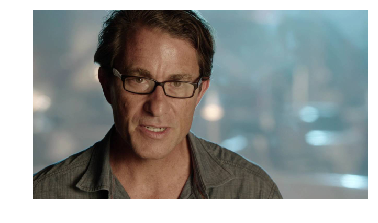

In [19]:
plt.axis('off')
plt.imshow(im)

In [20]:
# vgg_preprocess: output BGR channel w/ mean substracted.
inp_im = vgg_preprocess(im)

### model.predict()

In [21]:
out = model.predict([inp_im])

In [22]:
# post-process for display
out_resized = cv2.resize(np.squeeze(out), (im.shape[1],im.shape[0]))
out_resized_clipped = np.clip(out_resized.argmax(axis=2), 0, 1).astype(np.float64)

## Show results

In [26]:
out.shape

(1, 500, 500, 21)

In [27]:
out_resized_clipped.shape

(360, 640)

In [28]:
mask.shape

(360, 640)

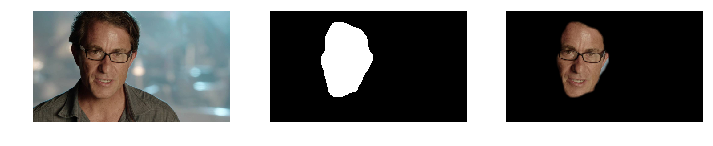

In [25]:
plt.figure(figsize=(12,6))
plt.subplot("131")
plt.axis('off')
plt.imshow(im)
plt.subplot("132")
plt.axis('off')
plt.imshow(out_resized_clipped, cmap='gray')
plt.subplot("133")
plt.axis('off')
mask = cv2.GaussianBlur(out_resized_clipped, (7,7), 6)
plt.imshow((mask[:,:,np.newaxis]*im.astype(np.float64)).astype(np.uint8))

In [36]:
out_resized_clipped

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [40]:
print(out_resized_clipped.shape)
print(mask.shape)
print(im.shape)

(360, 640)
(360, 640)
(360, 640, 3)


In [34]:
np.amax(out_resized_clipped)

1.0

In [35]:
np.mean(out_resized_clipped)

0.13049479166666667

In [46]:
face=im[mask==1]
face.shape

(27610, 3)

In [49]:
np.mean(face,axis=0)[0]

132.67508149221297

In [116]:
red = np.mean(im[mask == 1.0], axis=0)[0]

# If first pass (CSV file does not yet exist)
if not os.path.isfile('face.csv'):
    text_file = open('face.csv', 'w')
    text_file.write('date,score')
    text_file.write('\n24-May-18,%.1f' %red)
    text_file.close()

# If file already exists (appending new date to file)
else:
    # First read last date
    text_file = open('face.csv', 'r')
    lineList = text_file.readlines()
    text_file.close()
    lastdate = lineList[len(lineList)-1].split(',')[0]
    lastdate = datetime.strptime(lastdate,"%d-%b-%y")
#    print("Last recording:")
#    print(lastdate)
    
    nextdate = lastdate + timedelta(days=1)
    nextdate_out = nextdate.strftime("%-d-%b-%y")
#    print("Next recording:")
#    print(nextdate_out)
    
    text_file = open('face.csv', 'a')
    text_file.write('\n'+ str(nextdate_out) + ',%.1f' %red)
    text_file.close()

Last recording:
2018-05-24 00:00:00
Next recording:
25-May-18


In [4]:
os.getcwd()

'/Users/kevindonovan/Dropbox (MIT)/Hackathon Dermatology 201806/Kevin/face-segmentation-keras-master'